### Imports and setup

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("~/pings/ping_data/output_2024-01-20.csv", header=0, 
                 names=['time', 'latency_raw'], 
                 parse_dates=['time'],  # Specifying the column to parse as datetime
                 dtype={'latency_raw': object})  # Setting the data type for the 'latency_raw' column


In [38]:
# Capture a new column that has no strings, NaN's where we see strings (errors, or time outs)
df['latency_float'] = pd.to_numeric(df['latency_raw'], errors='coerce')

In [39]:
df.head(5)

,time,latency_raw,latency_float
0,2024-01-20 18:46:08,13.2,13.2
1,2024-01-20 18:46:09,28.9,28.9
2,2024-01-20 18:46:10,14.7,14.7
3,2024-01-20 18:46:12,18.3,18.3
4,2024-01-20 18:46:13,22.7,22.7


### Analysis

In [40]:
# Count nan's in the latency column
drops = df['latency_float'].isnull().sum()

# What's the percentage of ping drops?
drop_rate = drops/len(df)

print(f'There were {drops} drops out of {len(df)} pings, or {drop_rate*100:.3g}% drop rate.')

There were 1 drops out of 6630 pings, or 0.0151% drop rate.


In [41]:
# Let's drop the nan's and do some base analytics on the successful pings.
pings_list = df['latency_float'].apply(pd.to_numeric, errors='coerce')
print(pings_list.describe())

count    6629.000000
mean       18.712660
std         8.873483
min         9.020000
25%        13.900000
50%        16.300000
75%        21.200000
max       289.000000
Name: latency_float, dtype: float64


In [42]:
# What do the "NaN's" look like?
nans_df = df[df['latency_float'].isnull()]
nans_df['latency_raw'].value_counts()

PING www.google.com (142.251.116.99) 56(84) bytes of data.\n\n--- www.google.com ping statistics ---\n1 packets transmitted, 0 received, 100% packet loss, time 0ms\n\n    1
Name: latency_raw, dtype: int64

### Visualizations

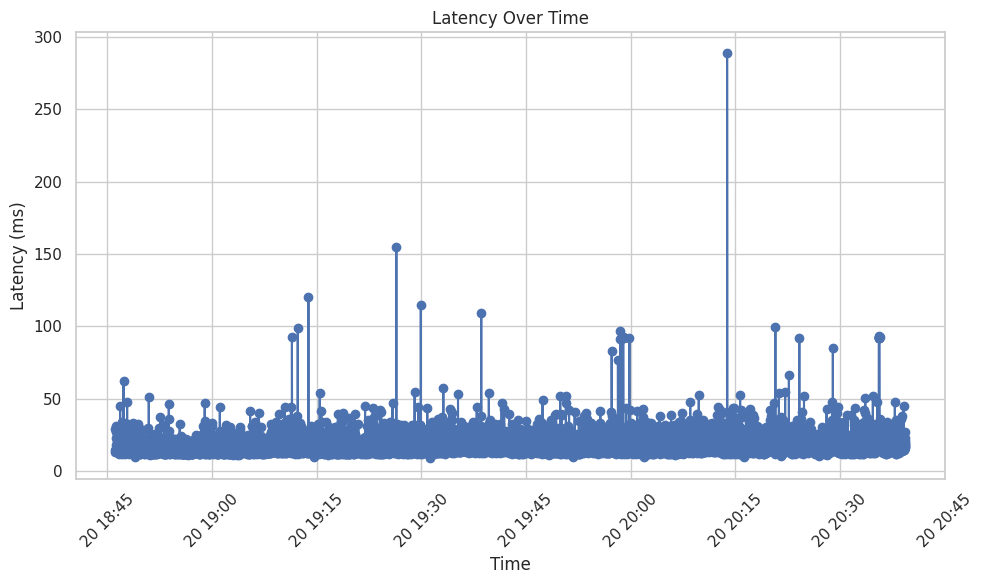

In [46]:
# Set the plot style for better aesthetics
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))  # You can adjust the size as per your requirement
plt.plot(df['time'], df['latency_float'], marker='o')  # 'o' adds markers to each data point

# Customize the plot
plt.title('Latency Over Time')
plt.xlabel('Time')
plt.ylabel('Latency (ms)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping

# Display the plot
plt.show()

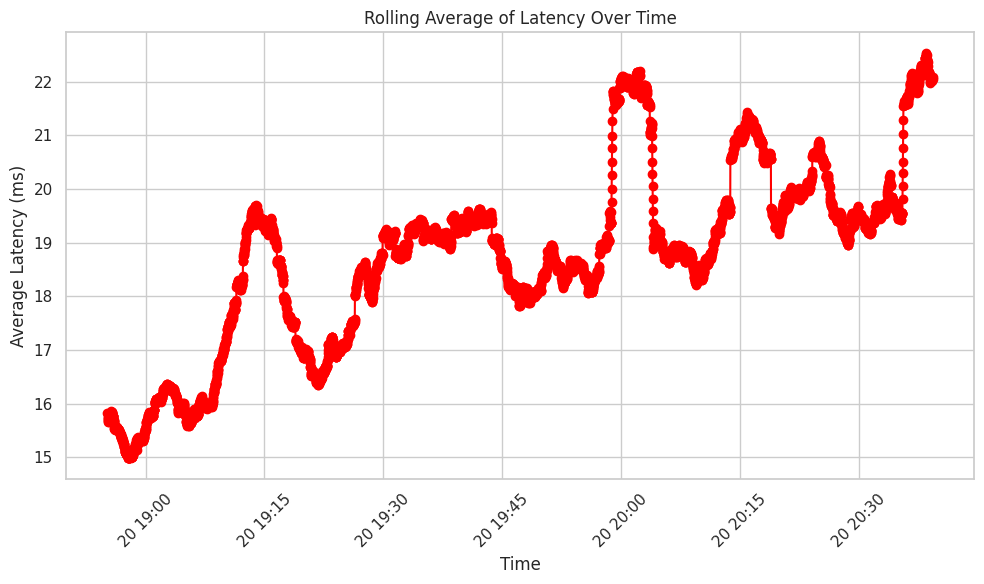

In [47]:
# Calculate the rolling average
window_size = 300  # Adjust this as needed
df['rolling_avg_latency'] = df['latency_float'].rolling(window=window_size).mean()

# Set the plot style for better aesthetics
sns.set(style="whitegrid")

# Create the plot for rolling average
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['rolling_avg_latency'], color='red', marker='o')

# Customize the plot
plt.title('Rolling Average of Latency Over Time')
plt.xlabel('Time')
plt.ylabel('Average Latency (ms)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()